In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/tmdb_movies_data.csv") #data from kaggle

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#loading data
df = df.drop(["cast", "homepage", "tagline", "overview", "production_companies", "keywords", "director"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [6]:
df["vote_count"].value_counts()

10      501
11      474
12      422
13      377
14      323
       ... 
652       1
628       1
612       1
2645      1
2027      1
Name: vote_count, Length: 1289, dtype: int64

In [7]:
df_temp = df[df.revenue != 0]
df_temp = df_temp[df_temp.budget != 0]
df_temp = df_temp
df_temp["profit"] = df_temp.revenue - df_temp.budget
df_temp = df_temp.sort_values(by = "profit", )

In [8]:
df_temp["genres"] = df_temp["genres"].str.split("|", n = 1, expand = True)
df_temp.groupby(by="genres")
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 2244 to 1386
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   imdb_id         3855 non-null   object 
 2   popularity      3855 non-null   float64
 3   budget          3855 non-null   int64  
 4   revenue         3855 non-null   int64  
 5   original_title  3855 non-null   object 
 6   runtime         3855 non-null   int64  
 7   genres          3855 non-null   object 
 8   release_date    3855 non-null   object 
 9   vote_count      3855 non-null   int64  
 10  vote_average    3855 non-null   float64
 11  release_year    3855 non-null   int64  
 12  budget_adj      3855 non-null   float64
 13  revenue_adj     3855 non-null   float64
 14  profit          3855 non-null   int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 481.9+ KB


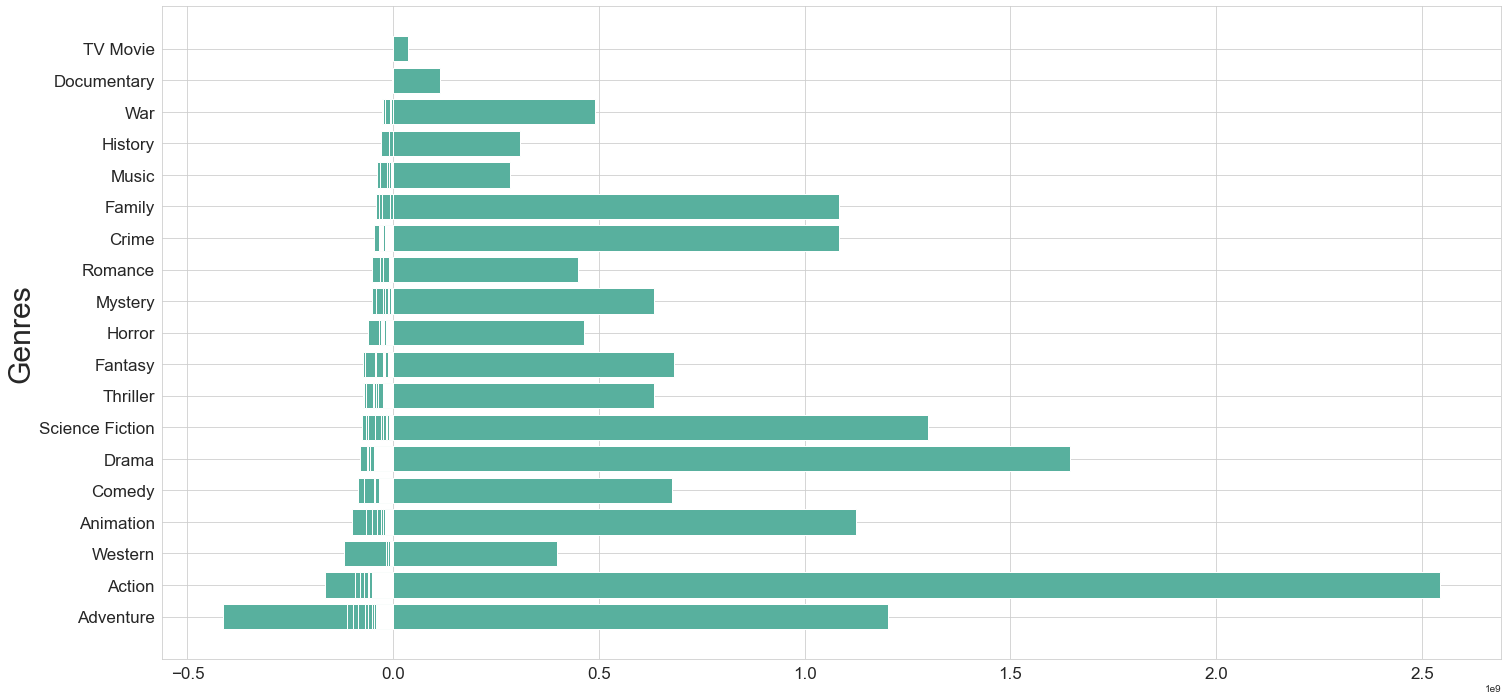

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(24,12))
ax.barh(df_temp["genres"], df_temp["profit"], color="#58b09e")
ax.set_ylabel("Genres", fontsize = 30)
ax.tick_params(labelsize = 17);

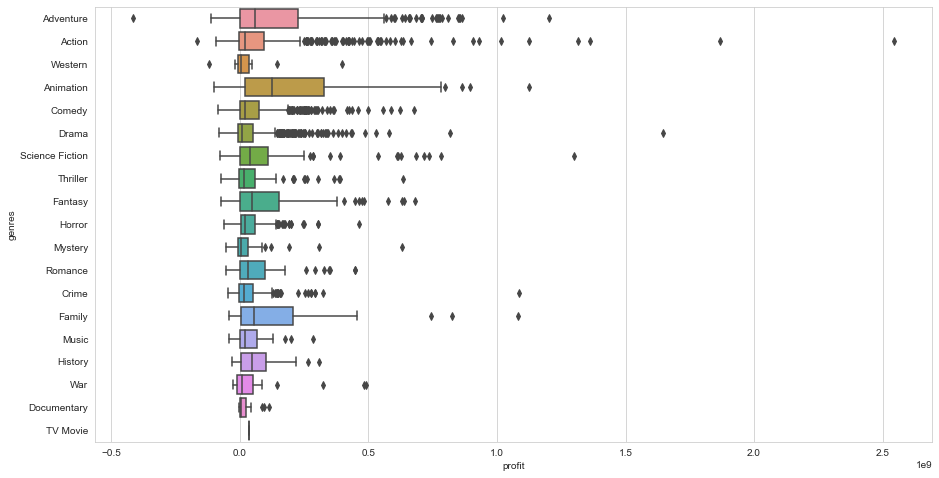

In [24]:
fig2, ax2 = plt.subplots(figsize=(15,8))
sns.boxplot(x=df_temp["profit"], y=df_temp["genres"], ax=ax2);